# Analyzing Results / Best Models

This notebook will visualize the predictions of the best models by loading them and their predictions. It will also look into local and global feature importances, 

First, Load the models and predictions

In [26]:
import joblib
import numpy as np
import os

def load_saved_models_and_predictions(model_dir, name):
    '''
    This function loads all models and predictions saved from the pipeline.

    Args:
    model_dir : str
        Directory where the models and predictions are saved.
    name : str
        The name used for saving the models and predictions.

    Returns:
    models : list
        List of loaded models.
    predictions : list
        List of corresponding predictions for each model.
    '''
    models = []
    predictions = []

    # Iterate over all files in the specified directory
    for file in os.listdir(model_dir):
        # Check for model files and prediction files
        if file.startswith(name):
            if file.endswith('.pkl'):
       
                # Load the model
                model_seed = file.split('_seed_')[-1].split('.pkl')[0]
                model_filename = os.path.join(model_dir, file)
                model = joblib.load(model_filename)
                models.append((model_seed, model))
                print(f"Loaded model: {file}")

            elif file.endswith('.npy'):
        
                # Load the predictions
                predictions_seed = file.split('_seed_')[-1].split('.npy')[0]
                predictions_filename = os.path.join(model_dir, file)
                preds = np.load(predictions_filename)
                predictions.append((predictions_seed, preds))
                print(f"Loaded predictions: {file}")

    # Return models and predictions
    return models, predictions

In [27]:
import pandas as pd
path = "/Users/djfiume/Desktop/DSI/1030/data-breach-ml/results/" # Change this! 

names_list = ["L1_Linerar_Regression", # i=0
              "L2_Linerar_Regression", # 1
              "Elastic-Net_Linerar_Regression", # 2
              "Random Forest", # 3
              "SVR", # 4
              "kNearestNeighbors", # 5
              "XGBoost", # 6
              "NN_MLP"] # 7

num_models = len(names_list)
all_pipelines = []
all_predictions = []
test_sets = []

# Load all of the model pipelines and the predictions. 
for i in range(num_models):
    pipeline, predictions = load_saved_models_and_predictions(path, names_list[i])
    all_pipelines.append(pipeline)
    all_predictions.append(predictions)

# Load the testsets
num_seeds = 5
for i in range(num_seeds):
    test_set = pd.read_csv(path + "processed_testdf" + str(i))
    test_sets.append(test_set)

Loaded model: L1_Linerar_Regression4.pkl
Loaded model: L1_Linerar_Regression3.pkl
Loaded model: L1_Linerar_Regression2.pkl
Loaded model: L1_Linerar_Regression0.pkl
Loaded model: L1_Linerar_Regression1.pkl
Loaded predictions: L1_Linerar_Regression4.npy
Loaded predictions: L1_Linerar_Regression0.npy
Loaded predictions: L1_Linerar_Regression1.npy
Loaded predictions: L1_Linerar_Regression3.npy
Loaded predictions: L1_Linerar_Regression2.npy
Loaded model: L2_Linerar_Regression0.pkl
Loaded model: L2_Linerar_Regression1.pkl
Loaded model: L2_Linerar_Regression3.pkl
Loaded model: L2_Linerar_Regression2.pkl
Loaded model: L2_Linerar_Regression4.pkl
Loaded predictions: L2_Linerar_Regression3.npy
Loaded predictions: L2_Linerar_Regression2.npy
Loaded predictions: L2_Linerar_Regression0.npy
Loaded predictions: L2_Linerar_Regression1.npy
Loaded predictions: L2_Linerar_Regression4.npy
Loaded model: Elastic-Net_Linerar_Regression3.pkl
Loaded model: Elastic-Net_Linerar_Regression2.pkl
Loaded model: Elasti

## Visualize the models

You could write code to determine the best model, but it is already done in the ML Pipeline notebook. The predictions for this model are averaged over the 5 random seeds 

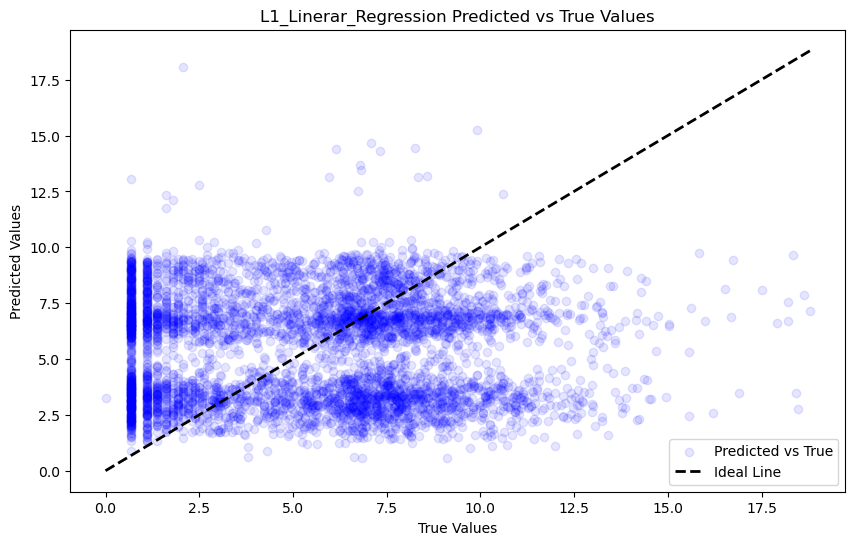

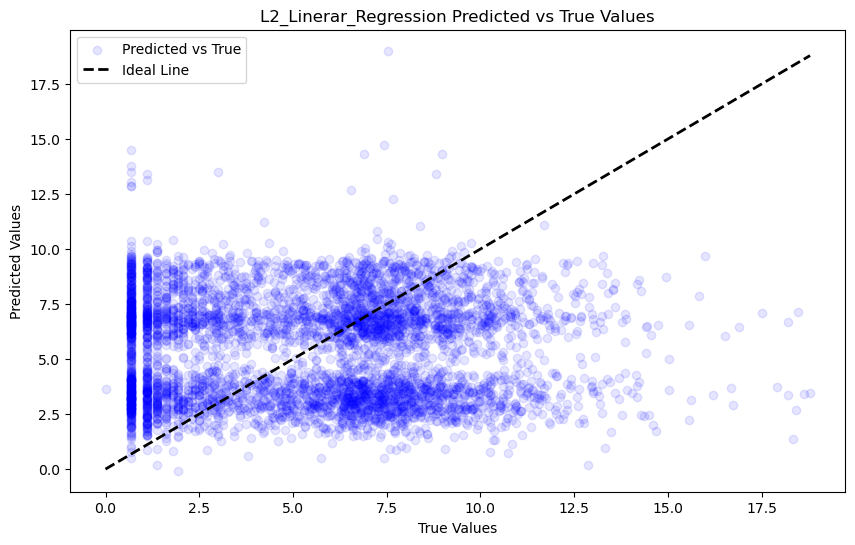

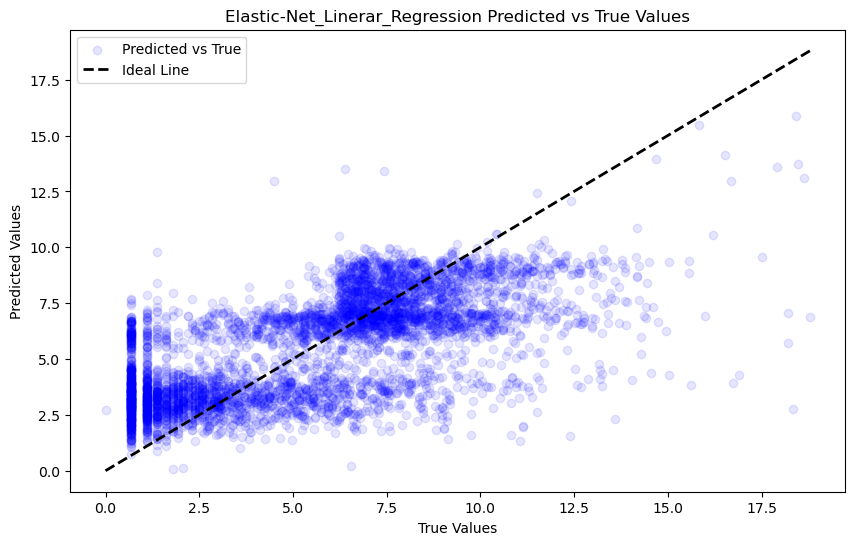

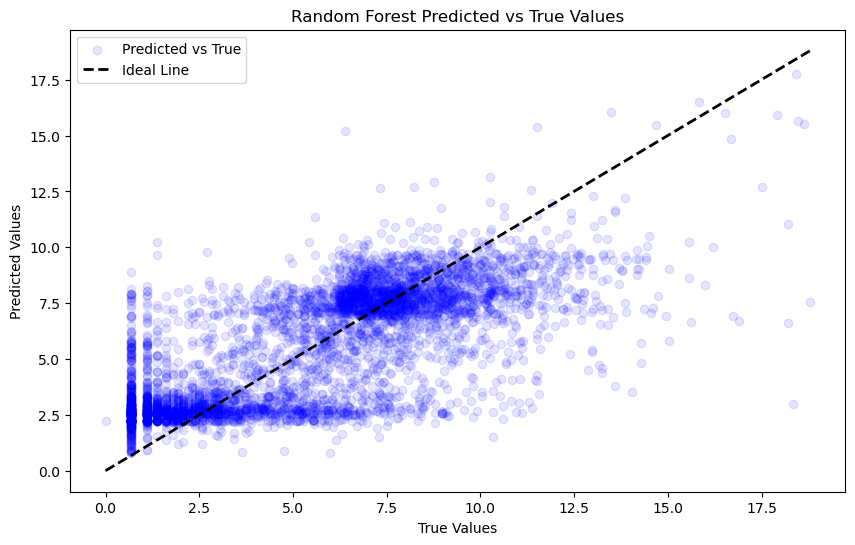

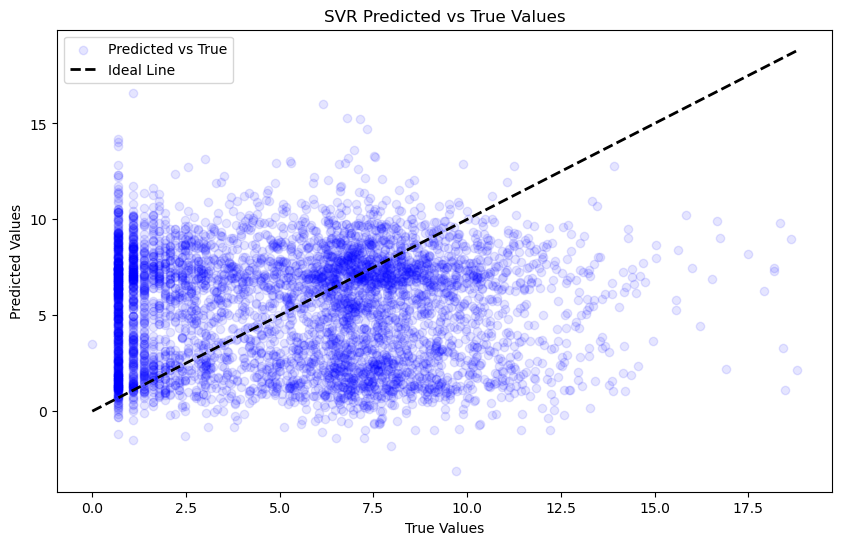

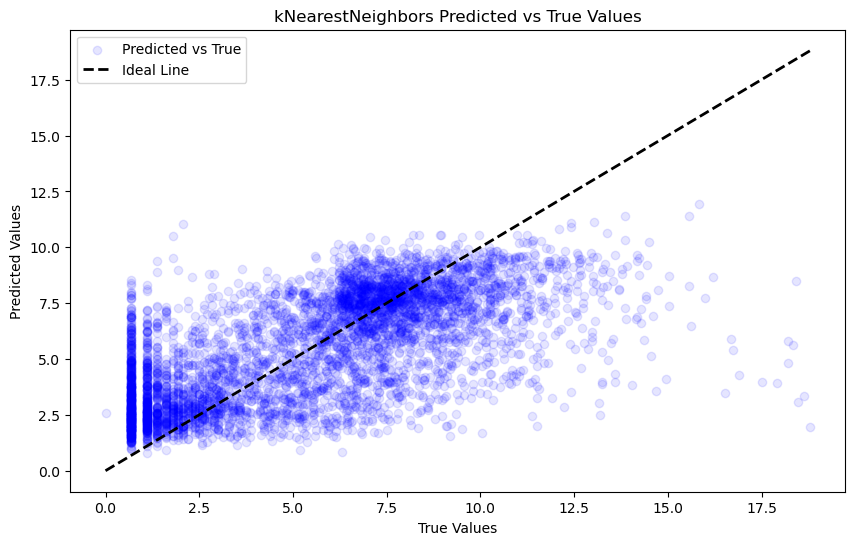

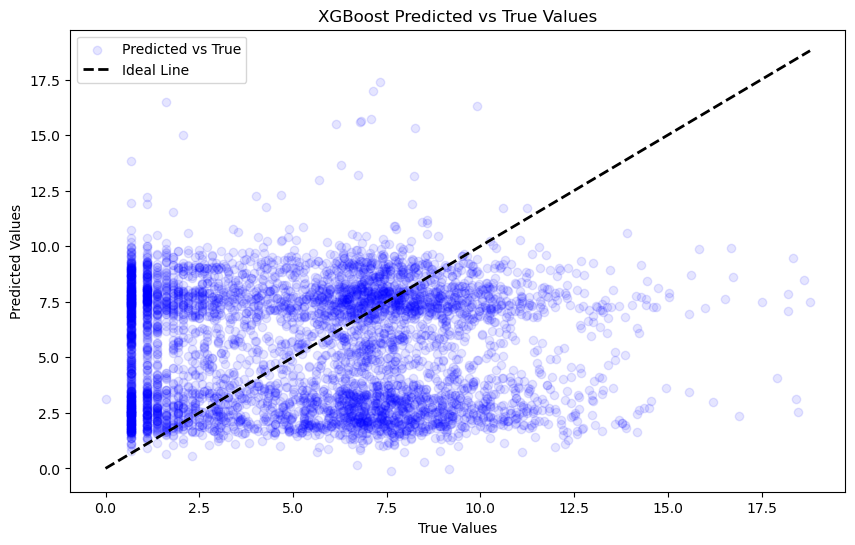

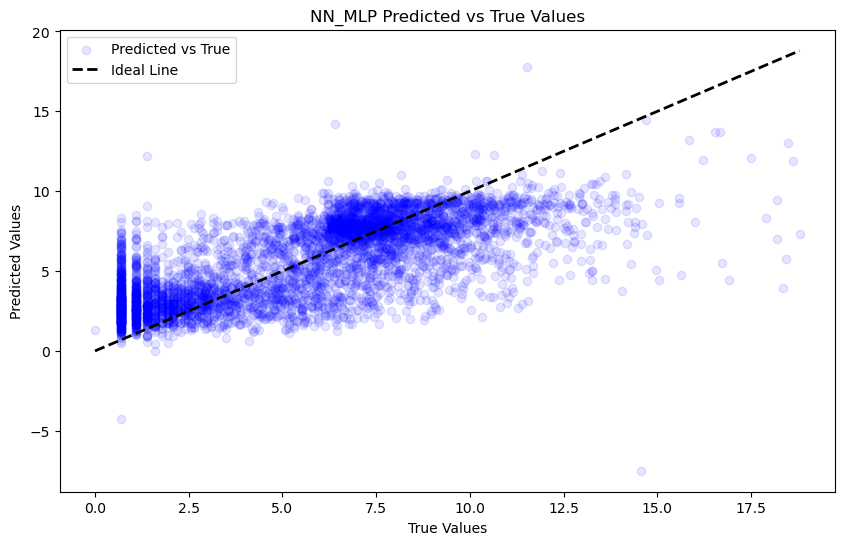

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i in range(num_models):
    y_pred = all_predictions[i][1][1]
    y_true = test_sets[1]["y"]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.1, label="Predicted vs True")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2, label="Ideal Line")
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(names_list[i] + " Predicted vs True Values")
    plt.legend()
    plt.show()


## Feature Importance

In [ ]:
# Get Set Up
# TODO get test set, feature names, model from the pipeline 

### Global

In [ ]:
# Perturbed Features
from sklearn.inspection import permutation_importance
important = permutation_importance(model, df_test, y_test, 
            n_repeats=10, random_state=0, scoring="r2")

top10_index = important.importances_mean.argsort()[::-1][:10]

for index in top10_index:
    print(feature_names[index],": " , 
          f"{important.importances_mean[index]:.4f}",
          f" +/- {important.importances_std[index]:.4f}")

plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(5,3))
plt.boxplot(test_r2 - important.importances[top10_index].T,tick_labels=feature_names[top10_index],vert=False)
plt.axvline(test_r2,label='test r2 score')
plt.title("Permutation Importances (test set)")
plt.xlabel('R2 score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# SHAP Values

import shap
shap.initjs()
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(df_test)
print(np.shape(shap_values))

shap_summary = np.mean(np.abs(shap_values), axis=0)
indcs = np.argsort(shap_summary)
plt.figure(figsize=(5,3))
plt.barh(feature_names[indcs[-10:]],shap_summary[indcs[-10:]])
plt.xlabel('mean(|SHAP value|)')
plt.title("Top 10 features based on Mean |SHAP| Value")
plt.show()

### Local

This displays feature importances for indivdual predictions using SHAP Values

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], df_test.iloc[0])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[1], df_test.iloc[1])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[2], df_test.iloc[2])